# MNIST Notebook example
Example of [mnist.py] use. It is also the code used to submit our prediction to the <b>[Kaggle digit-recognizer Challenge](https://www.kaggle.com/competitions/digit-recognizer/overview)</b><br>


In [ ]:
from MNIST import MNIST_data, MNIST, MNIST_gridSearch

import torch 
import torch.nn as nn

import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision.transforms as transforms
import pandas as pd

In [ ]:
class Paul2(nn.Module):
    def __init__(self):
        super(Paul2, self).__init__()

        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride = 1, padding = 0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, stride = 1, padding = 0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(4*4*16, 56)
        self.fc2 = nn.Linear(56, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.pool1(out)
        
        out = F.relu(self.conv2(out))
        out = self.pool2(out)

        out = out.view(-1, 4*4*16)

        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        return out

### Gridsearch

In [ ]:
batch_sizes = [16]
lrs = [0.0005]
epochs = [400]
model = Paul2()
criterions = [nn.CrossEntropyLoss]
optimizers = [optim.AdamW]

data = MNIST_data('train.csv', 'test.csv', 16, 0.8) # The batch_size parameter does not matter here.
mnist = MNIST(data)
grid_search = MNIST_gridSearch(model, mnist, criterions, optimizers, epochs, lrs, batch_sizes)

best_param, best_model = grid_search.gridSearch(verbose = 2)
best_param

Iteration 1 / 1 | score : 0.9857142857142858 | epoch : 400


{'optimizer': torch.optim.adamw.AdamW,
 'criterion': torch.nn.modules.loss.CrossEntropyLoss,
 'epochs': 400,
 'learning_rate': 0.0005,
 'batch_size': 16,
 'score': 0.9857142857142858}

In [5]:
print(mnist.evaluation(best_model))

0.9857142857142858


### Single hyperparameter combination model training

In [ ]:
# model = Paul2()
# data = MNIST_data('train.csv', 'test.csv', 16, 0.8)
# mnist = MNIST(data)

# output = mnist.train(model, nn.CrossEntropyLoss(), optim.AdamW(model.parameters(), lr=0.005), 20, verbose=1)

# mnist.evaluation(model)

### Submission

In [12]:
mnist.submit(best_model)

File created, ready to submit.


### Quick visualization for hints of future improvements

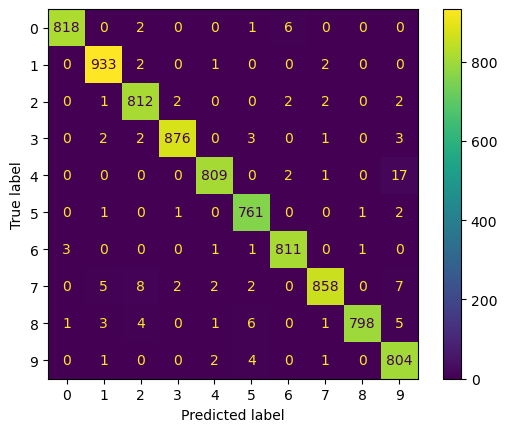

In [6]:
mnist.confusion_matrix_evaluation(best_model)